# N Queen Attack Detection

In [ ]:
import matplotlib.pyplot as plt

def drawBoard(P):
  n = len(P)
  # Create a figure and axes
  fig, ax = plt.subplots()

  # Set axis limits and aspect ratio
  ax.set_xlim(0, n)
  ax.set_ylim(0, n)
  ax.set_aspect('equal')

  # Turn off axis ticks and labels
  ax.set_xticks([])
  ax.set_yticks([])

  # Draw the board grid
  for i in range(n + 1):
      ax.plot([0, n], [i, i], 'k-', linewidth=2) # Horizontal lines
      ax.plot([i, i], [0, n], 'k-', linewidth=2) # Vertical lines

  # Place queens
  for i in range(n):
    row, col = P[i]
    # Adjust for visual centering
    ax.text(col - 0.5 , n - row + 0.5, 'Q'+str(i + 1), ha='center', va='center', fontsize=12, color='red', weight='bold')

  # Show the plot
  plt.show()

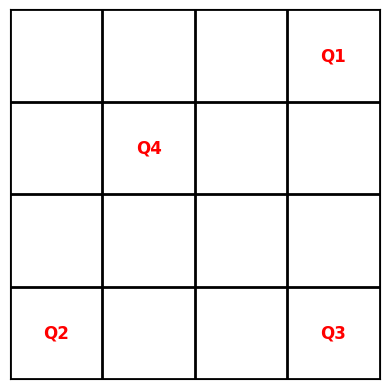

In [ ]:
import random
def generatePositions(n = 4):
  pos = []
  numbers  = random.sample(range(1,n*n), n)
  for v in numbers:
    pos.append((v//n+1,v%n+1))
  return pos

positions = generatePositions()
drawBoard(positions)

In [ ]:
# row attack
def rowAttacK(P):
  count = 0
  for i, (rowi , _) in enumerate(P):
    for j in range(i+1,len(P)):
      if  rowi == P[j][0]:
        print(f'row attack:Q{i+1}{P[i]} and Q{j+1}{P[j]}')
        count += 1
  return count

rowAttacK(positions)

row attack:Q2(4, 1) and Q3(4, 4)


1

In [ ]:
#column attack
def columnAttack(P):
    count = 0
    for i, (_, coli) in enumerate(P):
        for j in range(i+1, len(P)):
            if coli == P[j][1]:
                print(f'column attack:Q{i+1}{P[i]} and Q{j+1}{P[j]}')
                count += 1
    return count

print("Column", columnAttack(positions))

column attack:Q1(1, 4) and Q3(4, 4)
Column 1


In [ ]:
# diagonal atack
def diagonalAttack(P):
    count = 0
    for i, (rowi, coli) in enumerate(P):
        for j in range(i+1, len(P)):
            rowj, colj = P[j]
            if rowi - coli == rowj - colj or rowi + coli == rowj + colj:
                print(f'diagonal attack:Q{i+1}{P[i]} and Q{j+1}{P[j]}')
                count += 1
    return count

print("diagonal", diagonalAttack(positions))

diagonal attack:Q1(1, 4) and Q2(4, 1)
diagonal attack:Q3(4, 4) and Q4(2, 2)
diagonal 2


Positions: [(1, 3), (2, 4), (3, 1), (4, 2)]
Checking state validity for positions: [(1, 3), (2, 4), (3, 1), (4, 2)]
diagonal attack:Q1(1, 3) and Q2(2, 4)
diagonal attack:Q1(1, 3) and Q3(3, 1)
diagonal attack:Q2(2, 4) and Q4(4, 2)
diagonal attack:Q3(3, 1) and Q4(4, 2)
Found 4 diagonal conflict(s)
State is INVALID due to conflicts.
Valid state: False


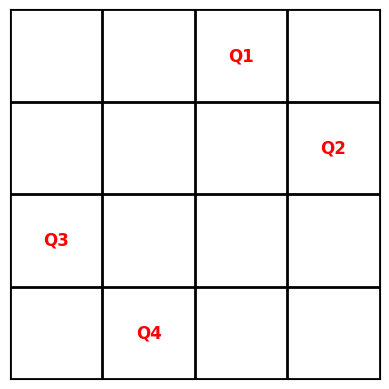

In [33]:
import random
import matplotlib.pyplot as plt

def generatePositions(n=4):
    cols = random.sample(range(1, n+1), n)
    return [(i+1, cols[i]) for i in range(n)]

def rowAttacK(P):
    count = 0
    for i, (rowi, _) in enumerate(P):
        for j in range(i+1, len(P)):
            if rowi == P[j][0]:
                print(f'row attack:Q{i+1}{P[i]} and Q{j+1}{P[j]}')
                count += 1
    return count

def columnAttack(P):
    count = 0
    for i, (_, coli) in enumerate(P):
        for j in range(i+1, len(P)):
            if coli == P[j][1]:
                print(f'column attack:Q{i+1}{P[i]} and Q{j+1}{P[j]}')
                count += 1
    return count

def diagonalAttack(P):
    count = 0
    for i, (rowi, coli) in enumerate(P):
        for j in range(i+1, len(P)):
            rowj, colj = P[j]
            if rowi - coli == rowj - colj or rowi + coli == rowj + colj:
                print(f'diagonal attack:Q{i+1}{P[i]} and Q{j+1}{P[j]}')
                count += 1
    return count

def isValid(P):
    print("Checking state validity for positions:", P)
    valid = True
    # Check row conflicts
    row_conflicts = rowAttacK(P)
    if row_conflicts > 0:
        print(f"Found {row_conflicts} row conflict(s)")
        valid = False
    # Check column conflicts
    col_conflicts = columnAttack(P)
    if col_conflicts > 0:
        print(f"Found {col_conflicts} column conflict(s)")
        valid = False
    # Check diagonal conflicts
    diag_conflicts = diagonalAttack(P)
    if diag_conflicts > 0:
        print(f"Found {diag_conflicts} diagonal conflict(s)")
        valid = False
    if valid:
        print("State is VALID: No row, column, or diagonal conflicts.")
    else:
        print("State is INVALID due to conflicts.")
    return valid

def drawBoard(P):
    n = len(P)
    fig, ax = plt.subplots()
    ax.set_xlim(0, n)
    ax.set_ylim(0, n)
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    for i in range(n + 1):
        ax.plot([0, n], [i, i], 'k-', linewidth=2)
        ax.plot([i, i], [0, n], 'k-', linewidth=2)
    for i, (row, col) in enumerate(P):
        if not (1 <= row <= n and 1 <= col <= n):
            raise ValueError(f"Invalid position ({row}, {col}) for {n}x{n} board")
        ax.text(col - 0.5, n - row + 0.5, f'Q{i+1}', ha='center', va='center', fontsize=12, color='red', weight='bold')
    plt.show()

positions = generatePositions()
print("Positions:", positions)
is_valid = isValid(positions)
print("Valid state:", is_valid)
drawBoard(positions)

Checking state validity for positions: [(1, 4), (2, 2), (3, 3), (4, 1)]
diagonal attack:Q1(1, 4) and Q4(4, 1)
diagonal attack:Q2(2, 2) and Q3(3, 3)
Found 2 diagonal conflict(s)
State is INVALID due to conflicts.
Checking state validity for positions: [(1, 3), (2, 1), (3, 4), (4, 2)]
State is VALID: No row, column, or diagonal conflicts.
A solution was found at step 2


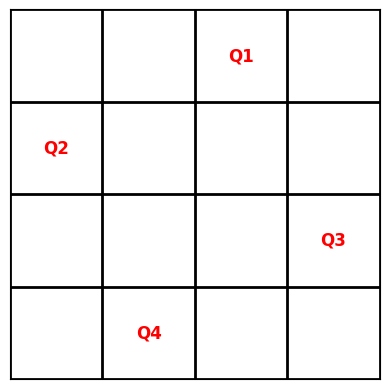

In [34]:
# call isValid untill you get valid solution
steps = 0
while(True):
  steps += 1
  pos = generatePositions(4)
  if isValid(pos):
    print(f'A solution was found at step {steps}')
    drawBoard(pos)
    break
  if steps >= 5:
    print(f'No solution was found in the first {steps} steps')
    break